In [764]:
# import packages

import pandas as pd

import numpy as np

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# encoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# scaling
from sklearn.preprocessing import StandardScaler
# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

#metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
    

# Data Understanding and Exploration

In [767]:
data = pd.read_csv("synthetic_food_dataset_imbalanced.csv")

In [769]:
data.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


In [771]:
data.shape

(31700, 16)

In [773]:
data.columns

Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size',
       'Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free',
       'Food_Name'],
      dtype='object')

In [775]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           31700 non-null  object 
dtypes: b

# Data Preprocessing

In [778]:
data.isnull().sum()

Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64

In [780]:
375/31700*100

1.1829652996845426

In [782]:
# drop null

data.dropna(inplace=True)

In [784]:
data.shape

(31325, 16)

In [786]:
data.duplicated().sum()

65

In [788]:
# drop duplicate

data.drop_duplicates(inplace=True)

In [790]:
data = data.reset_index(drop=True)

In [792]:
data.shape

(31260, 16)

In [794]:
data["Meal_Type"].value_counts()

Meal_Type
snack        7892
breakfast    7840
dinner       7770
lunch        7758
Name: count, dtype: int64

# EDA

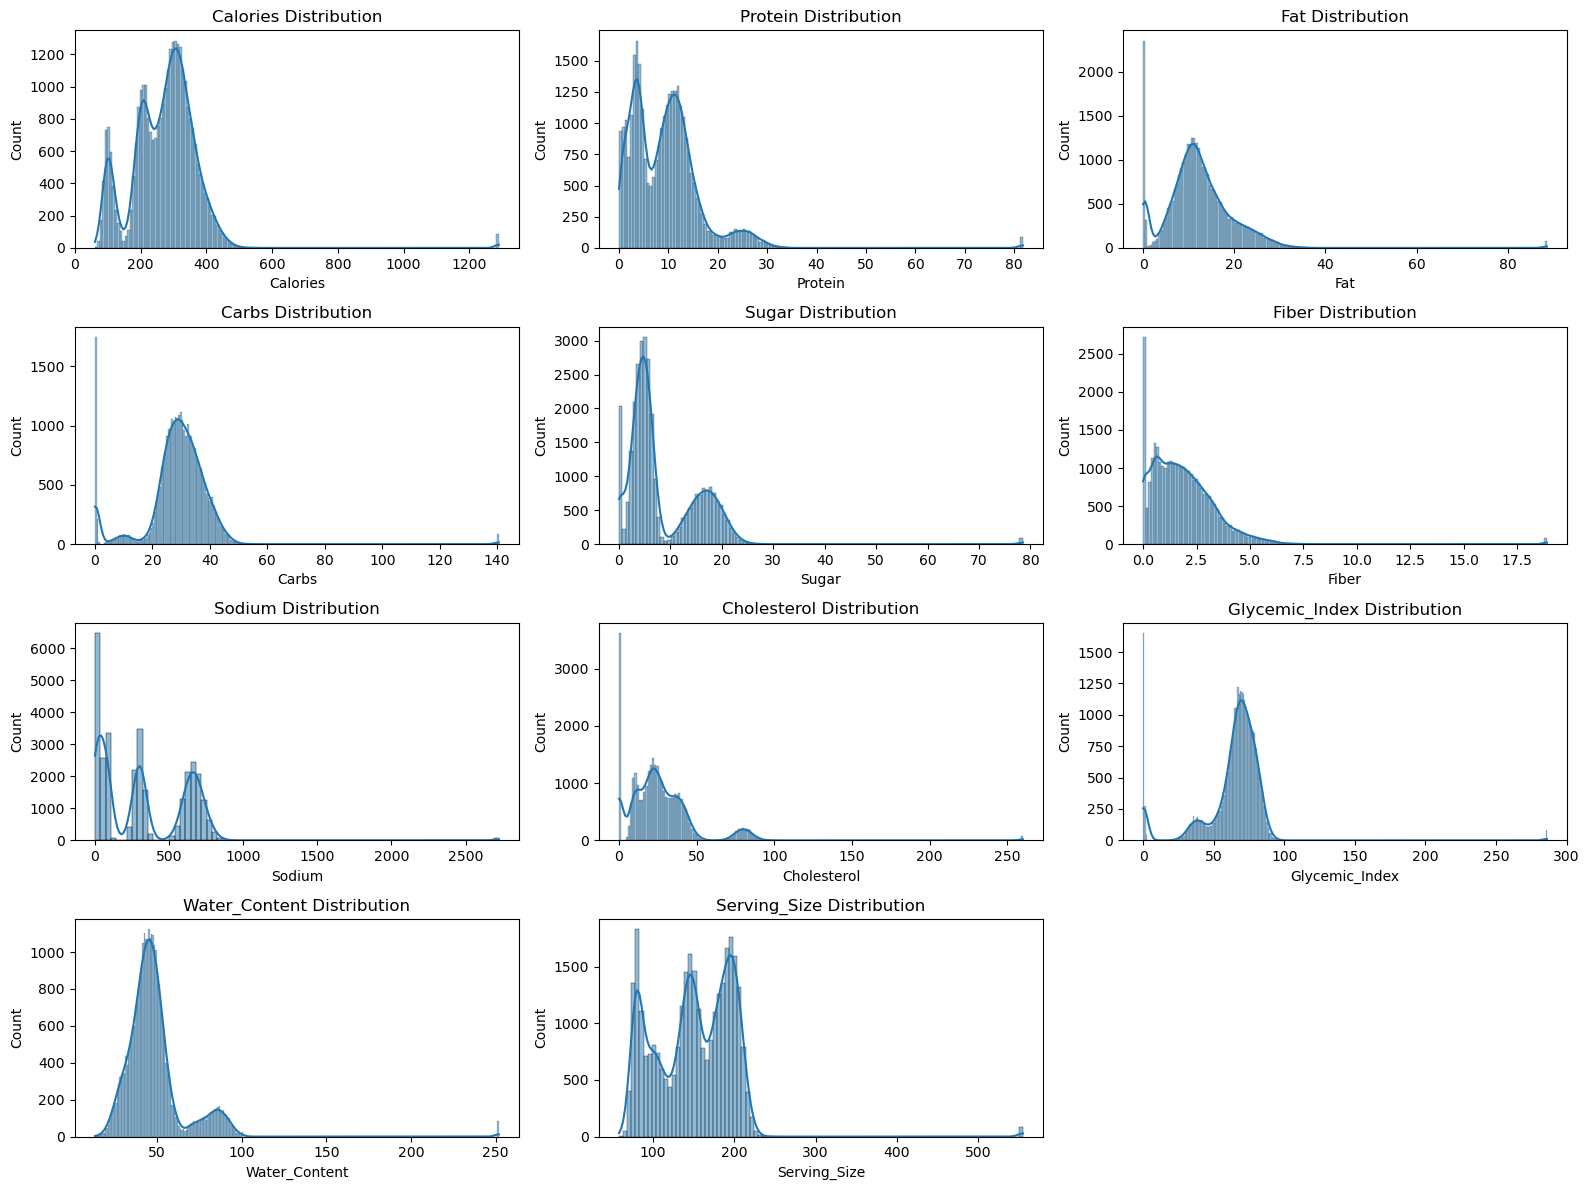

In [877]:
# trend of numeric cols

numeric_cols = ['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber',
                'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f"{col} Distribution")

plt.tight_layout()
plt.show()

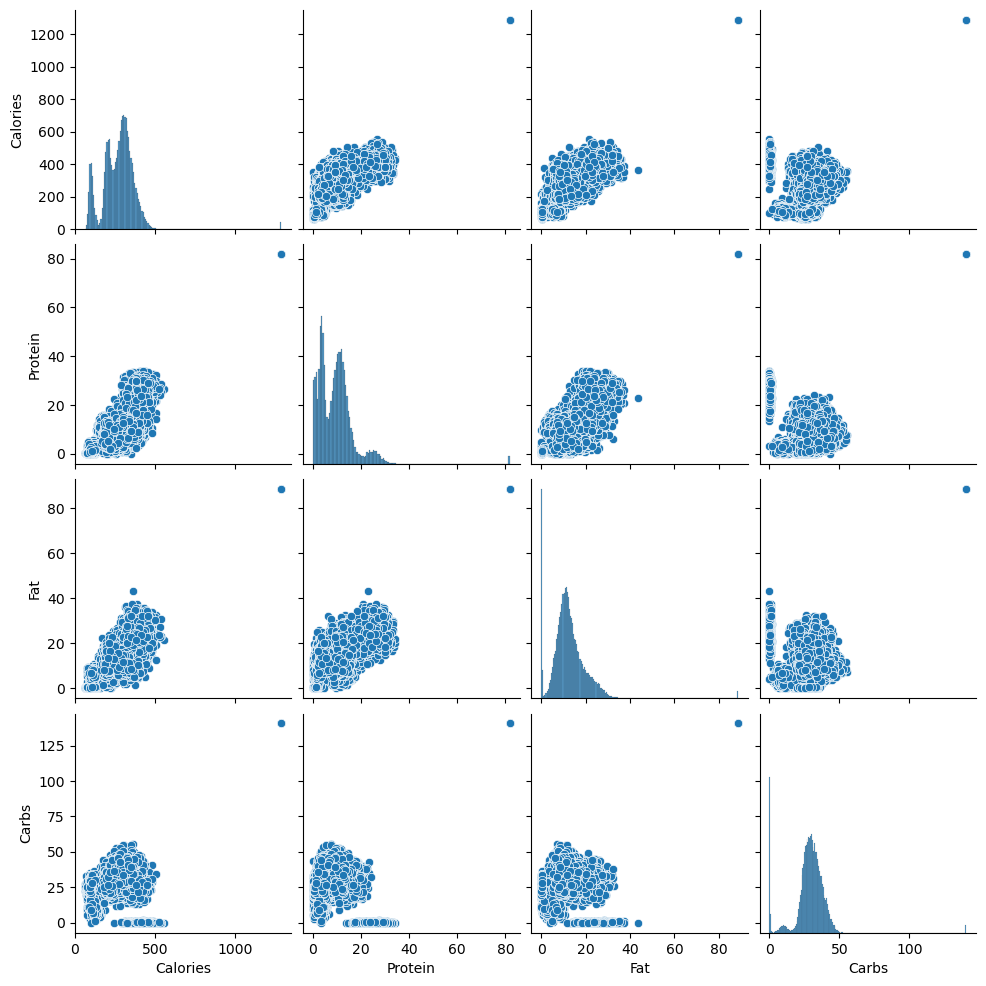

In [879]:
# pairplot for first 4

sns.pairplot(data[numeric_cols[:4]]) 
plt.show()

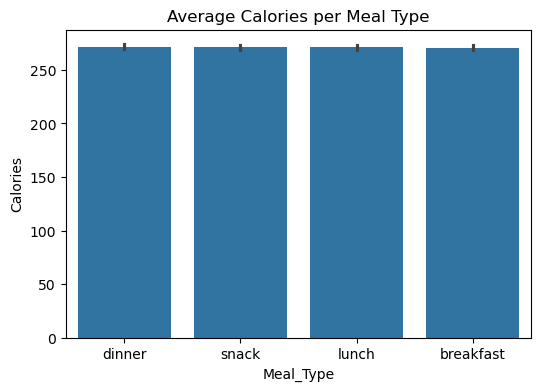

In [881]:
# Average Calories per Meal Type

plt.figure(figsize=(6,4))
sns.barplot(x="Meal_Type", y="Calories", data=data, estimator='mean')
plt.title("Average Calories per Meal Type")
plt.show()

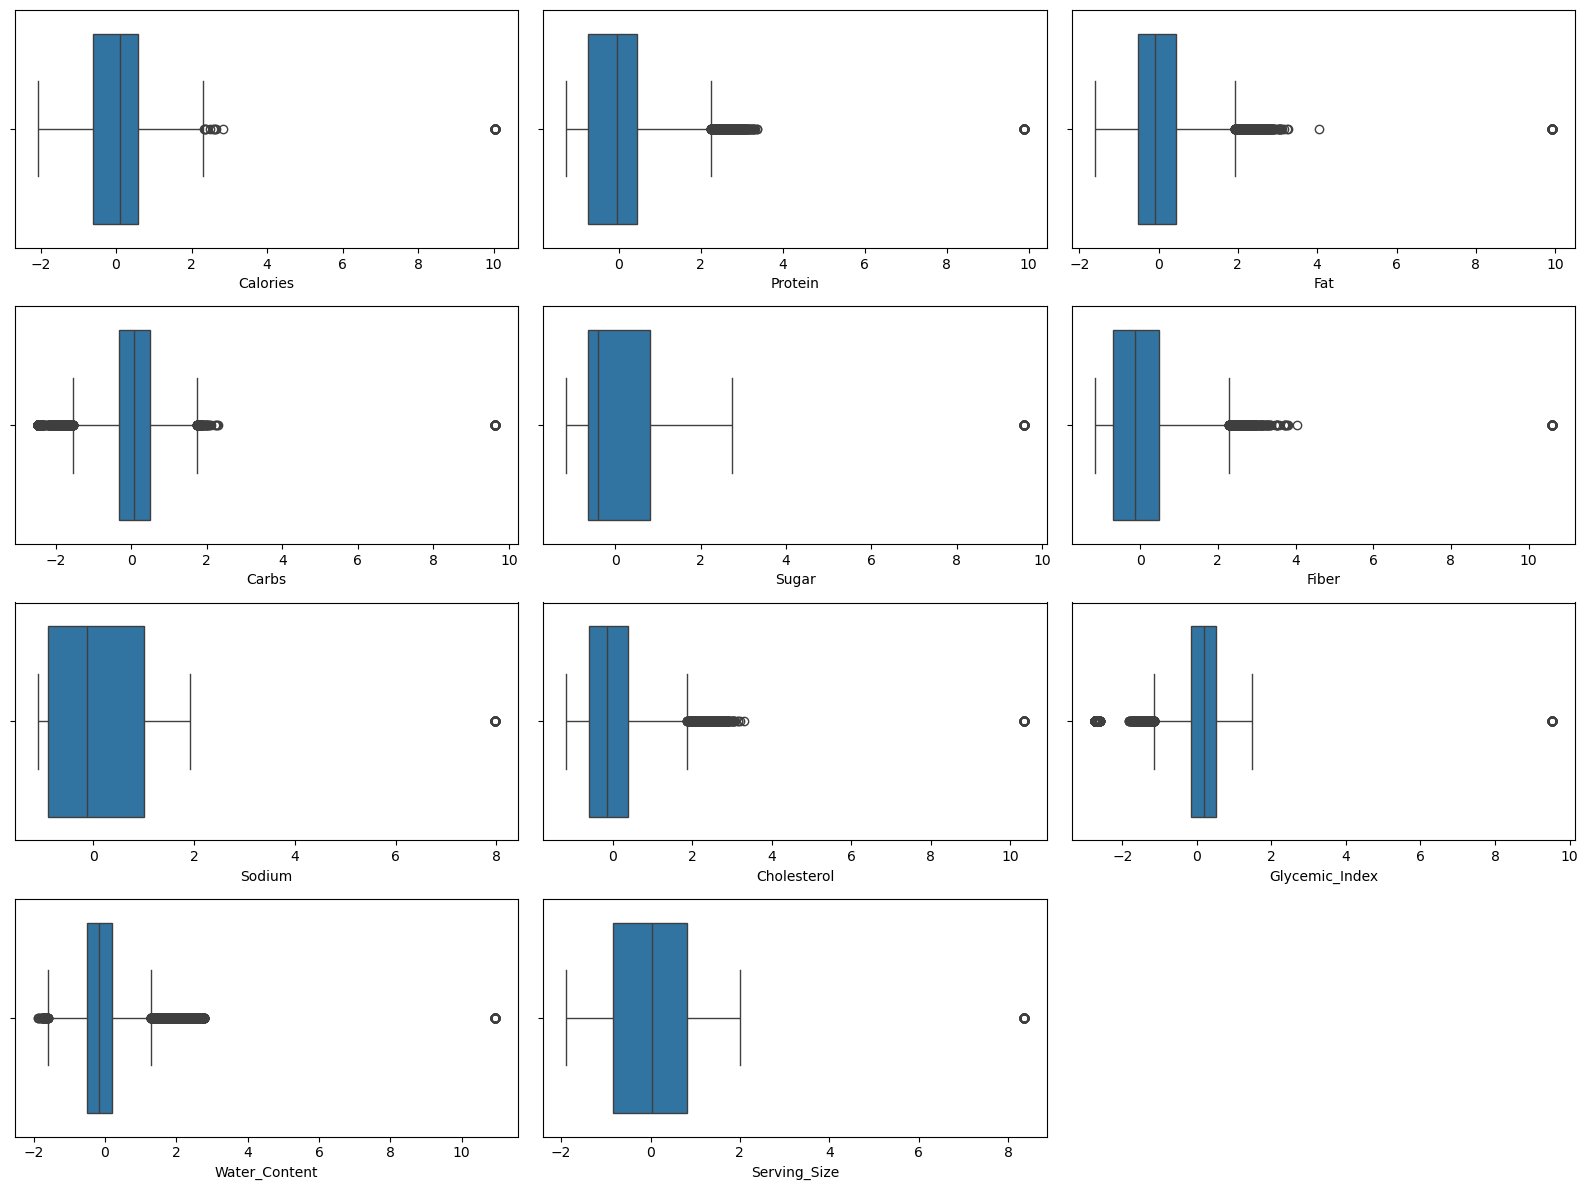

In [889]:
# outliers

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=data1[col])
    #plt.title(f"{col} Outliers")

plt.tight_layout()
plt.show()

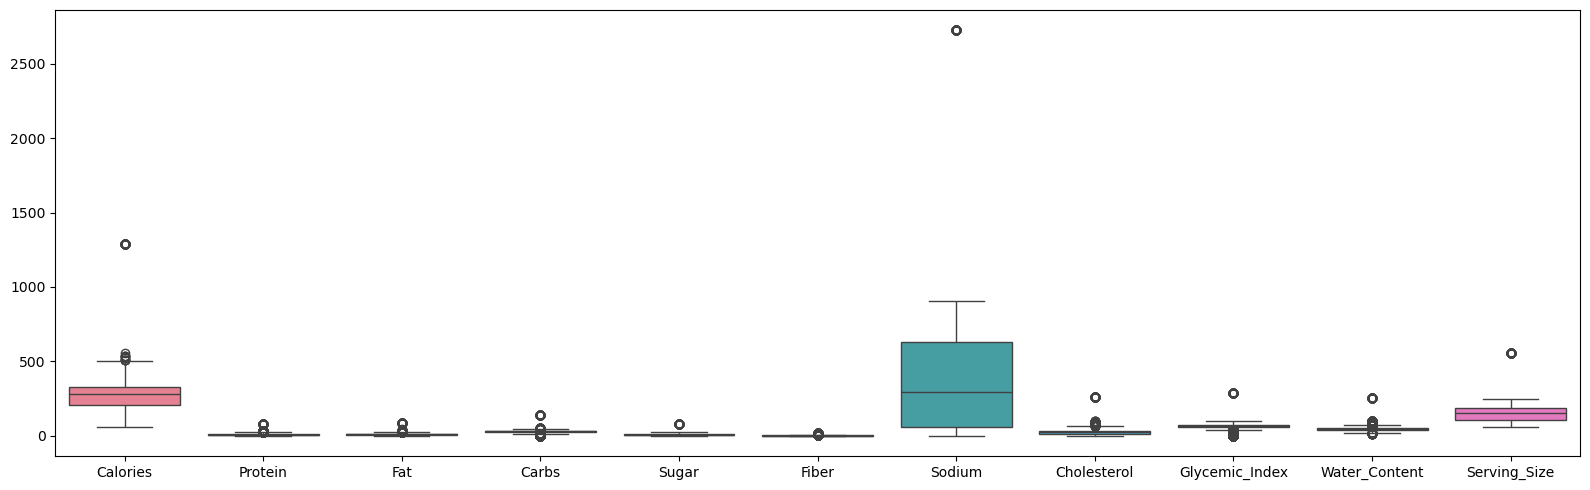

In [805]:

plt.figure(figsize=(16,5))
sns.boxplot(data[numeric_cols])


plt.tight_layout()
plt.show()

# Feature engineering

In [808]:
data["Meal_Type"].unique().tolist()

['dinner', 'snack', 'lunch', 'breakfast']

In [810]:
data["Preparation_Method"].unique()

array(['fried', 'raw', 'baked', 'grilled'], dtype=object)

In [812]:
data["Food_Name"].nunique()

10

In [814]:
# extracting target col food type

def classify_macro(row):
    protein = row["Protein"]
    fat = row["Fat"]
    carbs = row["Carbs"]
    
    # Check dominant macro
    if protein > fat and protein > carbs:
        return "High Protein"
    elif fat > protein and fat > carbs:
        return "High Fat"
    elif carbs > protein and carbs > fat:
        return "High Carb"
    else:
        return "Balanced"

# Create new target column
data["Food_Type"] = data1.apply(classify_macro, axis=1)


In [816]:
data["Food_Type"].value_counts()

Food_Type
High Carb       14068
High Fat         8870
High Protein     8322
Name: count, dtype: int64

In [818]:
data1 = data.copy()

In [820]:
data1.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name,Food_Type
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza,High Protein
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream,High Fat
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger,High Fat
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi,High Carb
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut,High Fat


## Encode

In [823]:
# Encode

lb = LabelEncoder()


data1["Meal_Type"] = lb.fit_transform(data1["Meal_Type"])
data1["Food_Type"] = lb.fit_transform(data1["Food_Type"])

In [825]:
od = OneHotEncoder(sparse_output=False)

encode_data = od.fit_transform(data1[["Preparation_Method"]])

encode_data_od = pd.DataFrame(
    encode_data,
    columns = od.get_feature_names_out(["Preparation_Method"])
)

data1 = pd.concat([data1.drop(columns =['Preparation_Method']), encode_data_od], axis =1)

In [827]:
data1.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Is_Vegan,Is_Gluten_Free,Food_Name,Food_Type,Preparation_Method_baked,Preparation_Method_fried,Preparation_Method_grilled,Preparation_Method_raw
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,1,False,False,Pizza,2,0.0,1.0,0.0,0.0
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,3,False,True,Ice Cream,1,0.0,0.0,0.0,1.0
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,3,False,False,Burger,1,0.0,0.0,0.0,1.0
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,2,False,True,Sushi,0,0.0,1.0,0.0,0.0
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,3,False,False,Donut,1,1.0,0.0,0.0,0.0


In [829]:
data1.drop(["Food_Name","Meal_Type"], inplace=True, axis =1) # Food_Name, Meal_Type contains no info so droping it

## Std scaling

In [832]:
data1.columns

Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size',
       'Is_Vegan', 'Is_Gluten_Free', 'Food_Type', 'Preparation_Method_baked',
       'Preparation_Method_fried', 'Preparation_Method_grilled',
       'Preparation_Method_raw'],
      dtype='object')

In [834]:
selected_col = ['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size']

In [836]:
# init
sd = StandardScaler()

sd_data = sd.fit_transform(data[selected_col])

scaled_data = pd.DataFrame(
    sd_data,
    columns=selected_col
)

In [838]:
scaled_data.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
0,0.189221,0.678076,0.238657,0.564516,-0.486998,-0.359968,1.056400,-0.061472,0.764630,-0.155307,0.983878
1,-0.577922,-0.722612,-0.090688,-0.472937,1.084364,-1.083988,-0.872240,0.350383,0.247547,0.069947,-0.950453
2,0.585736,0.676250,0.966706,0.066143,-0.292878,-0.669844,1.108427,0.373170,-0.051466,-0.453270,1.013166
3,-0.721382,0.010765,-0.890385,0.291646,-0.738449,-0.098678,-0.098836,0.094253,0.211784,0.477316,-0.292569
4,0.031850,-0.447007,0.512358,0.090037,1.221471,-0.251318,-0.113608,-0.485526,0.284551,-0.827990,-1.586326


In [840]:
data1[scaled_data.columns] = scaled_data

In [842]:
data1.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Is_Vegan,Is_Gluten_Free,Food_Type,Preparation_Method_baked,Preparation_Method_fried,Preparation_Method_grilled,Preparation_Method_raw
0,0.189221,0.678076,0.238657,0.564516,-0.486998,-0.359968,1.056400,-0.061472,0.764630,-0.155307,0.983878,False,False,2,0.0,1.0,0.0,0.0
1,-0.577922,-0.722612,-0.090688,-0.472937,1.084364,-1.083988,-0.872240,0.350383,0.247547,0.069947,-0.950453,False,True,1,0.0,0.0,0.0,1.0
2,0.585736,0.676250,0.966706,0.066143,-0.292878,-0.669844,1.108427,0.373170,-0.051466,-0.453270,1.013166,False,False,1,0.0,0.0,0.0,1.0
3,-0.721382,0.010765,-0.890385,0.291646,-0.738449,-0.098678,-0.098836,0.094253,0.211784,0.477316,-0.292569,False,True,0,0.0,1.0,0.0,0.0
4,0.031850,-0.447007,0.512358,0.090037,1.221471,-0.251318,-0.113608,-0.485526,0.284551,-0.827990,-1.586326,False,False,1,1.0,0.0,0.0,0.0


<Axes: >

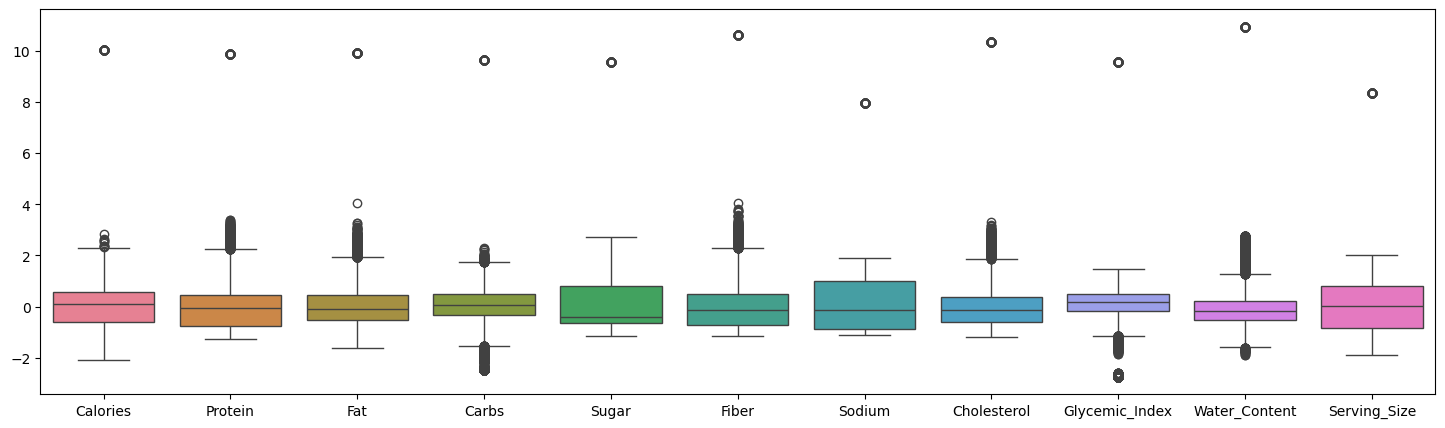

In [844]:
# outliers

plt.figure(figsize=(18,5))
sns.boxplot(scaled_data)

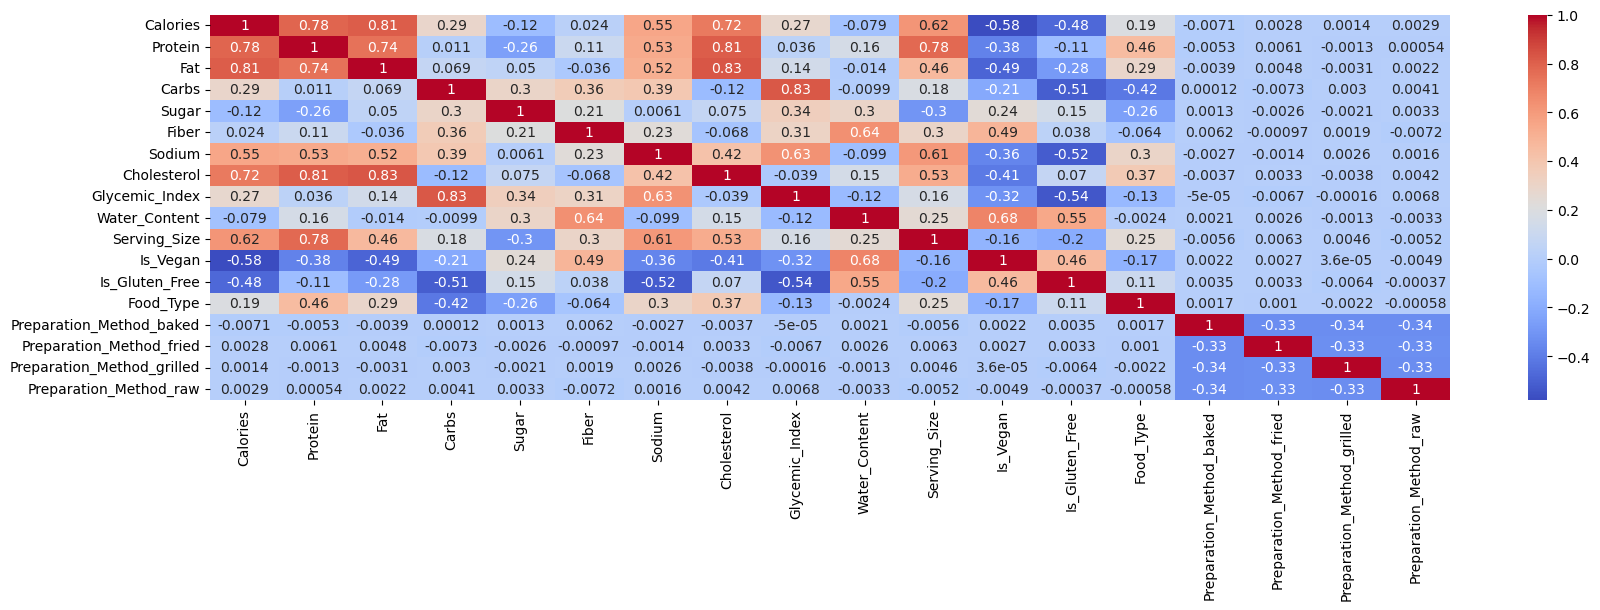

In [893]:
# heat map 

plt.figure(figsize=(20,5))

sns.heatmap(data1.corr(), cmap = "coolwarm", annot = True)

In [850]:
#  split value and target

val = data1.drop(["Food_Type"], axis =1)
tar = data1["Food_Type"]

## Feature selection 

In [853]:

# Embeded method 

fs = RandomForestClassifier(n_estimators=20, random_state= 67) 

fs.fit(val, tar)

RandomForestClassifier(n_estimators=20, random_state=67)

In [854]:
fs.feature_importances_

array([0.02628468, 0.19374722, 0.23711398, 0.22401149, 0.052501  ,
       0.01729747, 0.11113484, 0.05056315, 0.01997766, 0.01783146,
       0.02961818, 0.00409935, 0.01050705, 0.00132821, 0.00121169,
       0.00141065, 0.00136193])

In [857]:
pd.DataFrame({
    "columns" : val.columns,
    "score" : fs.feature_importances_*100
}).sort_values("score", ascending=False)

,columns,score
2,Fat,23.711398
3,Carbs,22.401149
1,Protein,19.374722
6,Sodium,11.113484
4,Sugar,5.250100
7,Cholesterol,5.056315
10,Serving_Size,2.961818
0,Calories,2.628468
8,Glycemic_Index,1.997766
9,Water_Content,1.783146


In [859]:
fs_s = pd.DataFrame({
    "columns" : val.columns,
    "score" : fs.feature_importances_*100
}).sort_values("score", ascending=False)

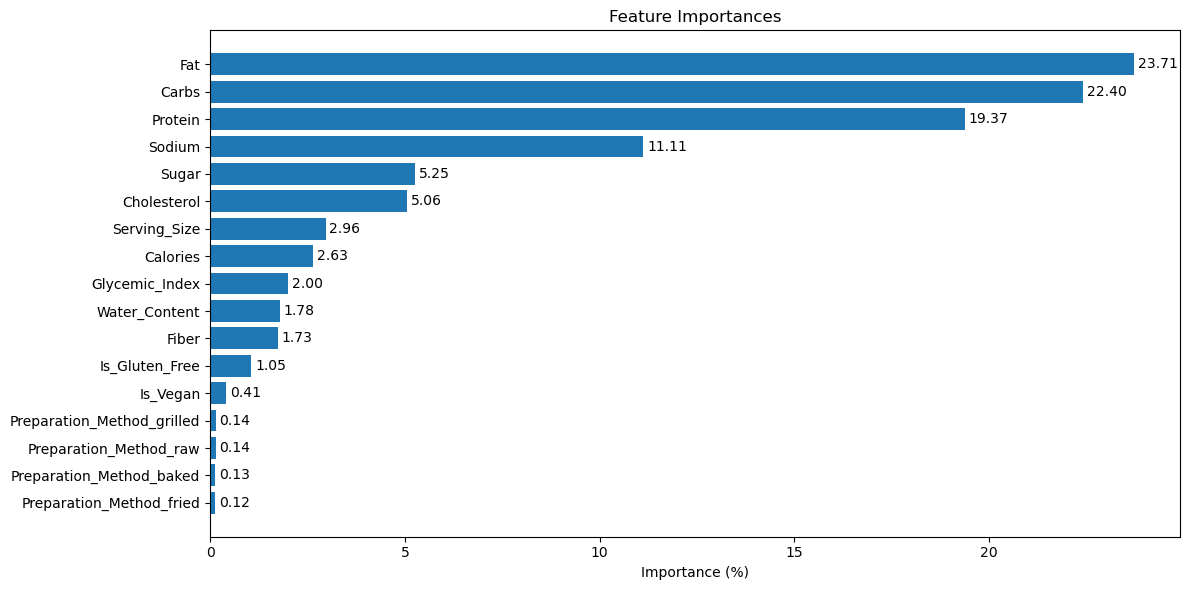

In [861]:
fs_s_sorted = fs_s.sort_values(by="score", ascending=True)

plt.figure(figsize=(12, 6))  # Adjust size as needed
plt.barh(fs_s_sorted["columns"], fs_s_sorted["score"])
plt.xlabel('Importance (%)')
plt.title('Feature Importances')

for index, value in enumerate(fs_s_sorted["score"]):
    plt.text(value + 0.1, index, f"{value:.2f}", va='center')
    
plt.tight_layout()
plt.show()

In [863]:
val = val.drop(["Preparation_Method_raw", "Preparation_Method_fried", "Preparation_Method_baked", "Preparation_Method_grilled",
               "Is_Gluten_Free", "Is_Vegan"], axis =1)

In [865]:
trdata, tsdata, trlabel, tslabel = train_test_split(val, tar, test_size=0.20, random_state=45)

# Model Selection and Training

In [868]:
label_names  = lb.classes_


================= Logistic Regression =================

TRAIN CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   High Carb       1.00      1.00      1.00     11203
    High Fat       1.00      1.00      1.00      7077
High Protein       1.00      1.00      1.00      6728

    accuracy                           1.00     25008
   macro avg       1.00      1.00      1.00     25008
weighted avg       1.00      1.00      1.00     25008


TEST CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   High Carb       1.00      1.00      1.00      2865
    High Fat       1.00      1.00      1.00      1793
High Protein       0.99      1.00      1.00      1594

    accuracy                           1.00      6252
   macro avg       1.00      1.00      1.00      6252
weighted avg       1.00      1.00      1.00      6252



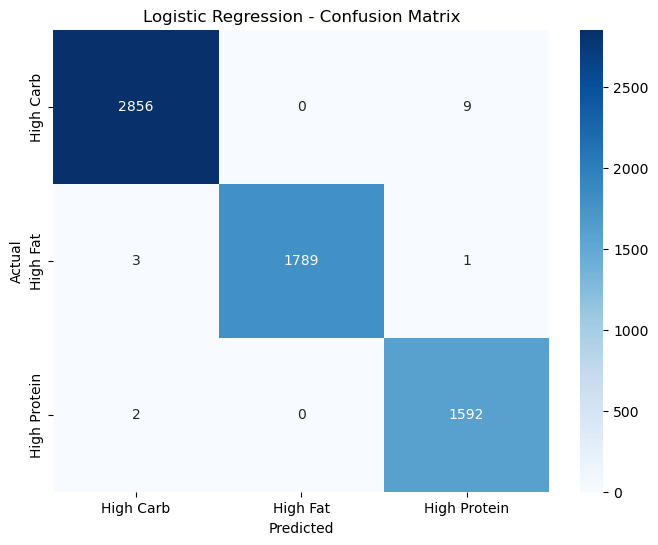


================= Decision Tree =================

TRAIN CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   High Carb       1.00      1.00      1.00     11203
    High Fat       1.00      1.00      1.00      7077
High Protein       1.00      1.00      1.00      6728

    accuracy                           1.00     25008
   macro avg       1.00      1.00      1.00     25008
weighted avg       1.00      1.00      1.00     25008


TEST CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   High Carb       0.98      0.99      0.98      2865
    High Fat       0.98      0.97      0.97      1793
High Protein       0.97      0.98      0.97      1594

    accuracy                           0.98      6252
   macro avg       0.98      0.98      0.98      6252
weighted avg       0.98      0.98      0.98      6252



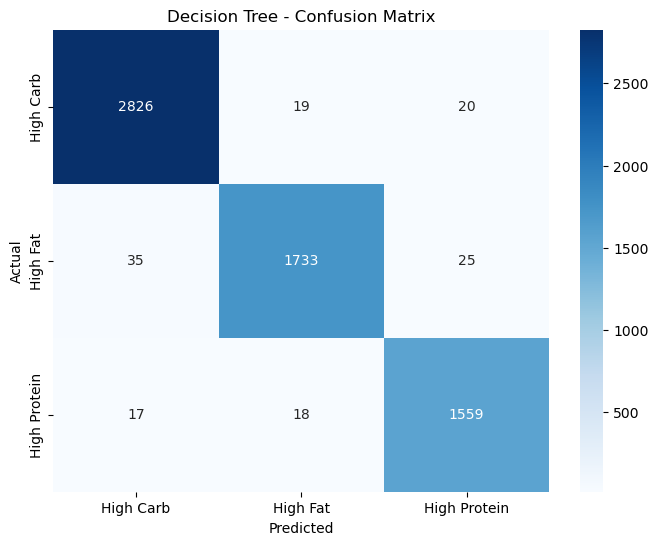


================= Random Forest =================

TRAIN CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   High Carb       1.00      1.00      1.00     11203
    High Fat       1.00      1.00      1.00      7077
High Protein       1.00      1.00      1.00      6728

    accuracy                           1.00     25008
   macro avg       1.00      1.00      1.00     25008
weighted avg       1.00      1.00      1.00     25008


TEST CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   High Carb       0.98      0.99      0.99      2865
    High Fat       0.98      0.97      0.98      1793
High Protein       0.97      0.98      0.98      1594

    accuracy                           0.98      6252
   macro avg       0.98      0.98      0.98      6252
weighted avg       0.98      0.98      0.98      6252



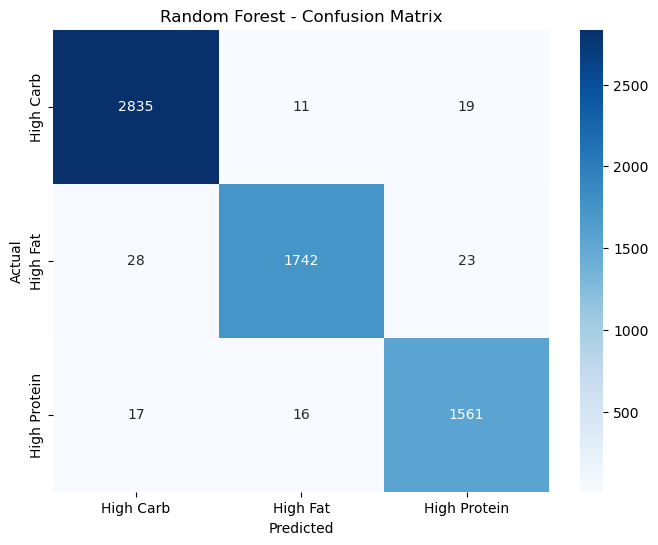


================= KNN =================

TRAIN CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   High Carb       0.96      0.96      0.96     11203
    High Fat       0.95      0.95      0.95      7077
High Protein       0.95      0.95      0.95      6728

    accuracy                           0.95     25008
   macro avg       0.95      0.95      0.95     25008
weighted avg       0.95      0.95      0.95     25008


TEST CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   High Carb       0.94      0.94      0.94      2865
    High Fat       0.92      0.90      0.91      1793
High Protein       0.89      0.93      0.91      1594

    accuracy                           0.93      6252
   macro avg       0.92      0.92      0.92      6252
weighted avg       0.93      0.93      0.93      6252



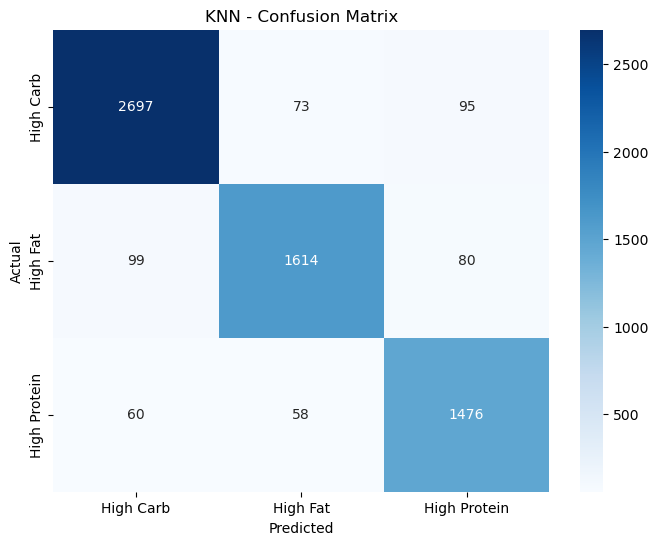


================= SVM =================

TRAIN CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   High Carb       1.00      0.99      0.99     11203
    High Fat       0.99      0.99      0.99      7077
High Protein       0.98      0.99      0.99      6728

    accuracy                           0.99     25008
   macro avg       0.99      0.99      0.99     25008
weighted avg       0.99      0.99      0.99     25008


TEST CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   High Carb       1.00      0.99      0.99      2865
    High Fat       0.99      0.98      0.99      1793
High Protein       0.98      0.99      0.99      1594

    accuracy                           0.99      6252
   macro avg       0.99      0.99      0.99      6252
weighted avg       0.99      0.99      0.99      6252



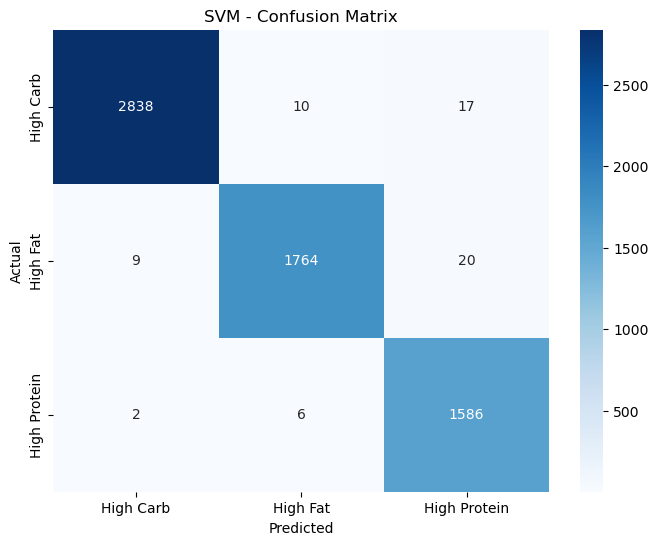


================= XGBoost =================


C:\Users\rajar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:09:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



TRAIN CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   High Carb       1.00      1.00      1.00     11203
    High Fat       1.00      1.00      1.00      7077
High Protein       1.00      1.00      1.00      6728

    accuracy                           1.00     25008
   macro avg       1.00      1.00      1.00     25008
weighted avg       1.00      1.00      1.00     25008


TEST CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   High Carb       0.99      0.99      0.99      2865
    High Fat       0.99      0.98      0.99      1793
High Protein       0.98      0.99      0.99      1594

    accuracy                           0.99      6252
   macro avg       0.99      0.99      0.99      6252
weighted avg       0.99      0.99      0.99      6252



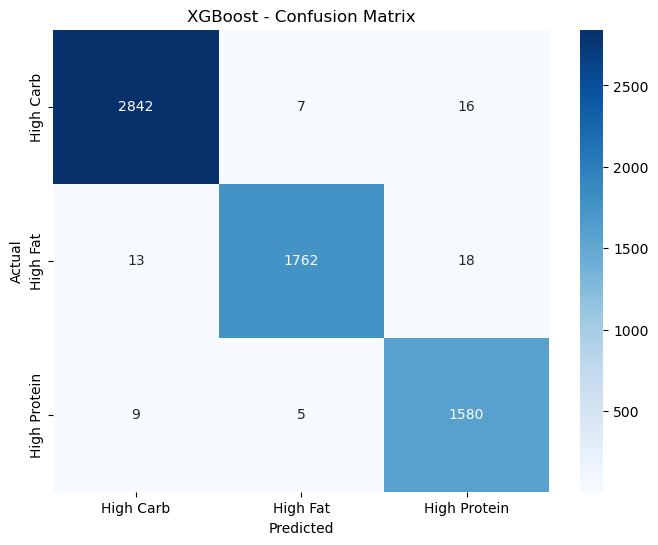


================= Gradient Boosting =================

TRAIN CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   High Carb       0.99      0.99      0.99     11203
    High Fat       0.99      0.99      0.99      7077
High Protein       0.99      0.99      0.99      6728

    accuracy                           0.99     25008
   macro avg       0.99      0.99      0.99     25008
weighted avg       0.99      0.99      0.99     25008


TEST CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   High Carb       0.99      0.99      0.99      2865
    High Fat       0.99      0.97      0.98      1793
High Protein       0.97      0.98      0.97      1594

    accuracy                           0.98      6252
   macro avg       0.98      0.98      0.98      6252
weighted avg       0.98      0.98      0.98      6252



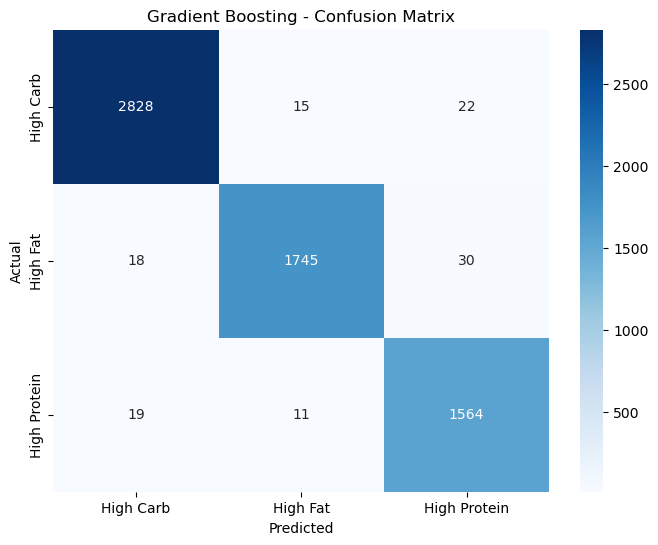



 FINAL MODEL COMPARISON TABLE
                 Model  Train Accuracy  Test Accuracy  Train F1   Test F1
0  Logistic Regression        0.997641       0.997601  0.997641  0.997602
4                  SVM        0.990563       0.989763  0.990569  0.989774
5              XGBoost        1.000000       0.989123  1.000000  0.989128
2        Random Forest        1.000000       0.981766  1.000000  0.981756
6    Gradient Boosting        0.990723       0.981606  0.990725  0.981614
1        Decision Tree        1.000000       0.978567  1.000000  0.978553
3                  KNN        0.954335       0.925624  0.954341  0.925658


In [870]:

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), 
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}


results = []

for name, model in models.items():
    print(f"\n================= {name} =================")
    
    model.fit(trdata, trlabel)

    # Predictions
    tr_pred = model.predict(trdata)
    ts_pred = model.predict(tsdata)

    # ---- TRAIN METRICS ----
    tr_acc  = accuracy_score(trlabel, tr_pred)
    tr_prec = precision_score(trlabel, tr_pred, average='weighted', zero_division=0)
    tr_rec  = recall_score(trlabel, tr_pred, average='weighted')
    tr_f1   = f1_score(trlabel, tr_pred, average='weighted')

    # ---- TEST METRICS ----
    ts_acc  = accuracy_score(tslabel, ts_pred)
    ts_prec = precision_score(tslabel, ts_pred, average='weighted', zero_division=0)
    ts_rec  = recall_score(tslabel, ts_pred, average='weighted')
    ts_f1   = f1_score(tslabel, ts_pred, average='weighted')

    # Save results
    results.append({
        "Model": name,
        "Train Accuracy": tr_acc,
        "Test Accuracy": ts_acc,
        "Train F1": tr_f1,
        "Test F1": ts_f1
    })

    # ---- TRAIN CLASSIFICATION REPORT ----
    print("\nTRAIN CLASSIFICATION REPORT:")
    print(classification_report(trlabel, tr_pred, target_names=label_names))

    # ---- TEST CLASSIFICATION REPORT ----
    print("\nTEST CLASSIFICATION REPORT:")
    print(classification_report(tslabel, ts_pred, target_names=label_names))

    # ---- CONFUSION MATRIX ----
    cm = confusion_matrix(tslabel, ts_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=label_names, yticklabels=label_names)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ---- RESULTS TABLE ----
results_df = pd.DataFrame(results)
print("\n\n FINAL MODEL COMPARISON TABLE")
print(results_df.sort_values(by="Test Accuracy", ascending=False))


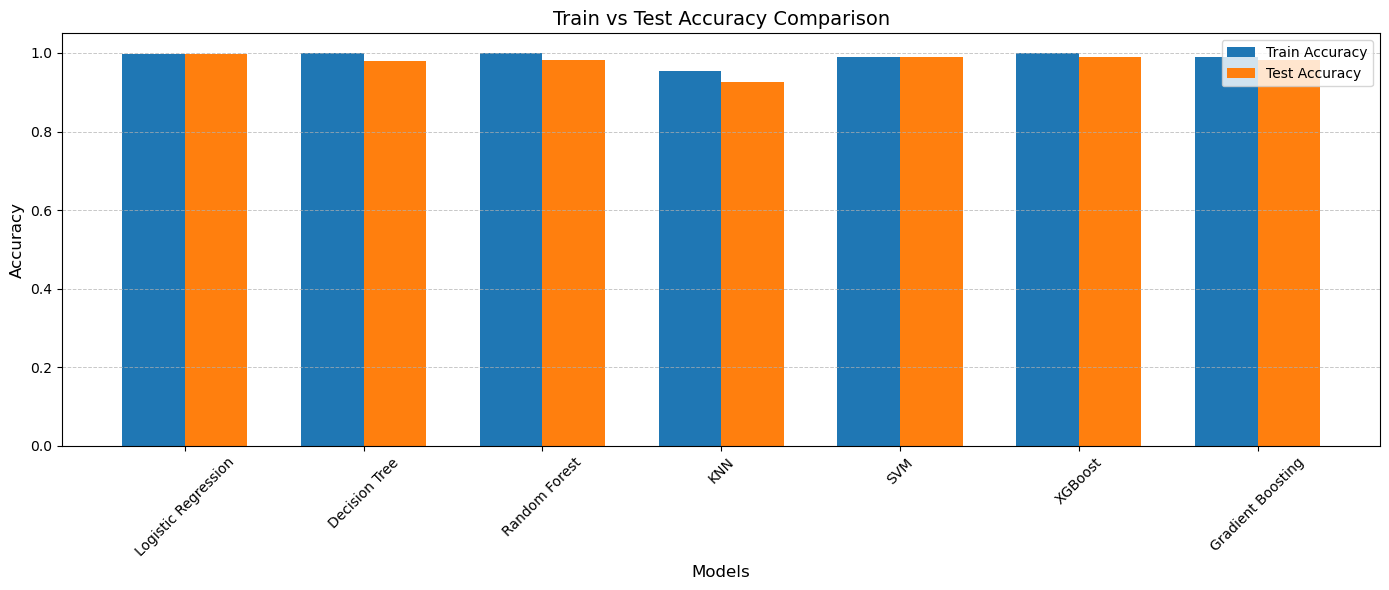

In [533]:
# Model Selection

# Extract values
models = results_df["Model"]
train_acc = results_df["Train Accuracy"]
test_acc = results_df["Test Accuracy"]

index = np.arange(len(models))

# Plot
plt.figure(figsize=(14, 6))
plt.bar(index, train_acc, bar_width, label='Train Accuracy')
plt.bar(index + bar_width, test_acc, bar_width, label='Test Accuracy')

# Labels & Titles
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Train vs Test Accuracy Comparison', fontsize=14)
plt.xticks(index + bar_width / 2, models, rotation=45)

plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# best model Logistic Regression